In [1]:
# import packages yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
# inisialisasi hyperparameter
w = 0.76
c1 = 0.5
c2 = 0.5
n_agent = 25
max_iter = 50
# upper bound dan lower bound
ub = 20
lb = -20

In [3]:
# definisikan fungsi yang dioptimasi
def function(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
#     return -(np.cos(x[0]) * np.cos(x[1]) * np.exp(-1 * ((x[0] - np.pi)**2 + (x[1] - np.pi)**2)))

In [4]:
# definisikan fungsi fitness
def fitness(x):
    return 1.5 ** -x

In [5]:
# definisikan fungsi velocity
def velocity(w, v0, c1, c2, personal_best, global_best, agent_pos):
    individual_cognition = c1 * np.random.random() * (personal_best - agent_pos)
    social_cognition = c2 * np.random.random() * (global_best - agent_pos)
    return (w * v0) + individual_cognition + social_cognition

In [6]:
# inisialisasi sebanyak n agent
# setiap agent punya key posisi dan fitness
dimension = 2 # karena ruang pencarian kita hanya 2 dimensi (x dan y)
positions = np.random.uniform(lb,ub,size=[n_agent,dimension])

agents = []
for pos in positions:
    agents.append({'pos': pos})

for agent in agents:
    agent['fit'] = fitness(function(agent['pos']))

In [7]:
# definisikan posisi personal_best dan index global_best
personal_best = max(agents, key=lambda x:x['fit'])['pos']
global_best = deepcopy(personal_best)

In [8]:
# perulangan sampai max_iter
v = np.zeros((n_agent,dimension))
pos_history = []
for i in range(max_iter):
    # simpan posisi untuk divisualisasikan
    pos = deepcopy([x['pos'] for x in agents])
    pos_history.append(pos)
    
    # untuk setiap agent
    for k in range(n_agent):
        # hitung velocity agent
        agent_pos = agents[k]['pos']
        v[k] = velocity(w, v[k], c1, c2, personal_best, global_best, agent_pos)
        # perbarui posisi agent
        agents[k]['pos'] += v[k]
    
    # untuk semua agent
    for agent in agents:
        # hitung nilai fitness agent
        agent['fit'] = fitness(function(agent['pos']))
        
    # pilih partikel dengan fitness terbaik, simpan
    personal_best = max(agents, key=lambda x:x['fit'])['pos']
    if fitness(function(personal_best)) > fitness(function(global_best)):
        global_best = deepcopy(personal_best)
        

<IPython.core.display.Javascript object>


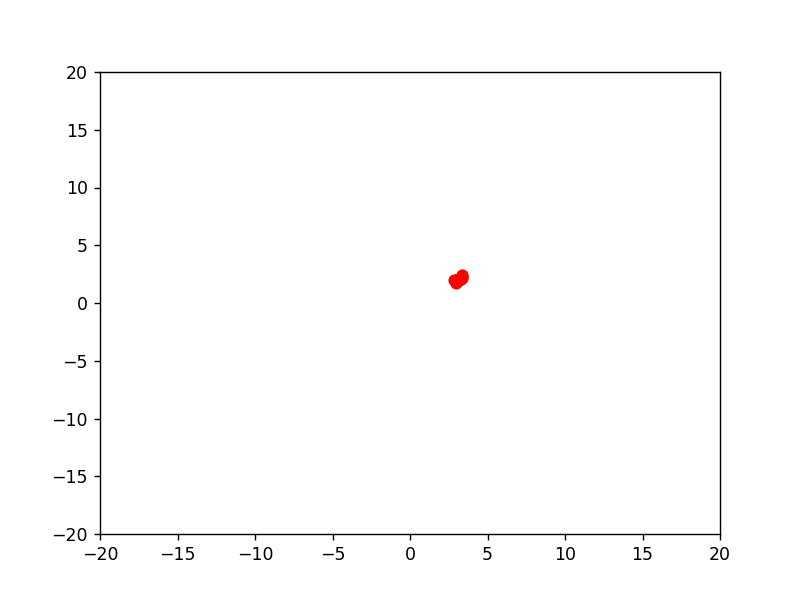

In [9]:
%matplotlib notebook
from matplotlib.animation import ArtistAnimation

fig = plt.figure()

ax = plt.axes(xlim=(lb,ub),ylim=(lb,ub))

ims = []
for i in range(max_iter):
    x_agent = [x[0] for x in pos_history[i]]
    y_agent = [x[1] for x in pos_history[i]]
    
    im = plt.scatter(x_agent, y_agent, c='r', animated=True)
    ims.append([im])

ani = ArtistAnimation(fig, ims, blit=True, interval=200,
                                repeat_delay=2000)